In [1]:
%load_ext autoreload
%autoreload 2

import easyCGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
in_sp_abunds_flat = "/home/isaac/SGD_empirical/empirical_reunion_spiders/abunds_flat.txt"
in_sp_abunds_df = "/home/isaac/SGD_empirical/empirical_reunion_spiders/spider_abunds_df.txt"
in_sp_fasta = "/home/isaac/SGD_empirical/empirical_reunion_spiders/spider-fasta/"
in_moth_fasta = "/home/isaac/SGD_empirical/empirical_micromoths/micromoth_fasta_aligned/"
in_wvm_fasta = "/home/isaac/SGD_empirical/empirical_weevils/weevil_fasta/mauritius/"
in_wvr_fasta = "/home/isaac/SGD_empirical/empirical_weevils/weevil_fasta/reunion/"
sp_abund_df = easyCGD.load_data(in_sp_abunds_df, labels="spiders")
sp_pis_df = easyCGD.get_pis_from_fastas(in_sp_fasta, outfile="spider.pis", colname="spiders")
mo_pis_df = easyCGD.get_pis_from_fastas(in_moth_fasta, outfile="moth.pis", colname="moths")
wvm_pis_df = easyCGD.get_pis_from_fastas(in_wvm_fasta, outfile="weevils_mauritius.pis", colname="weevils_mauritius")
wvr_pis_df = easyCGD.get_pis_from_fastas(in_wvr_fasta, outfile="weevils_reunion.pis", colname="weevils_reunion")


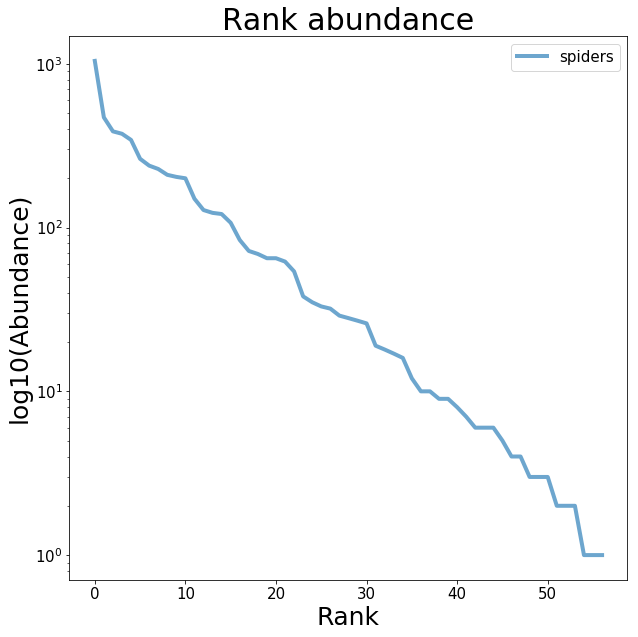

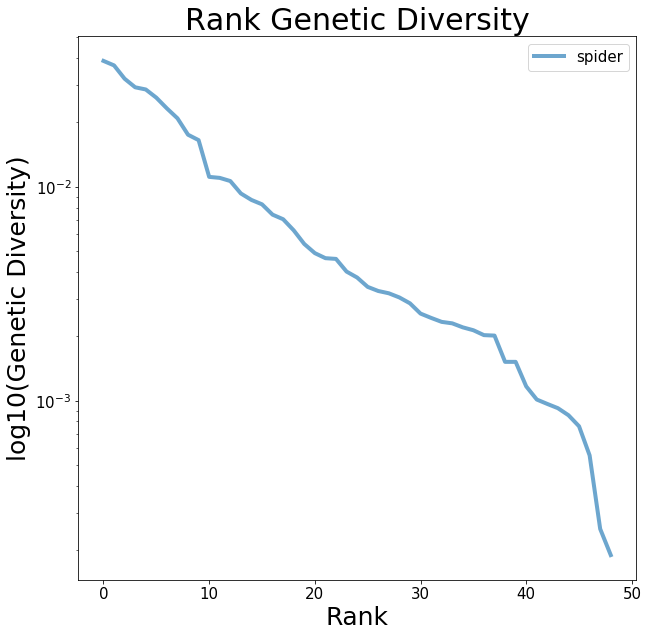

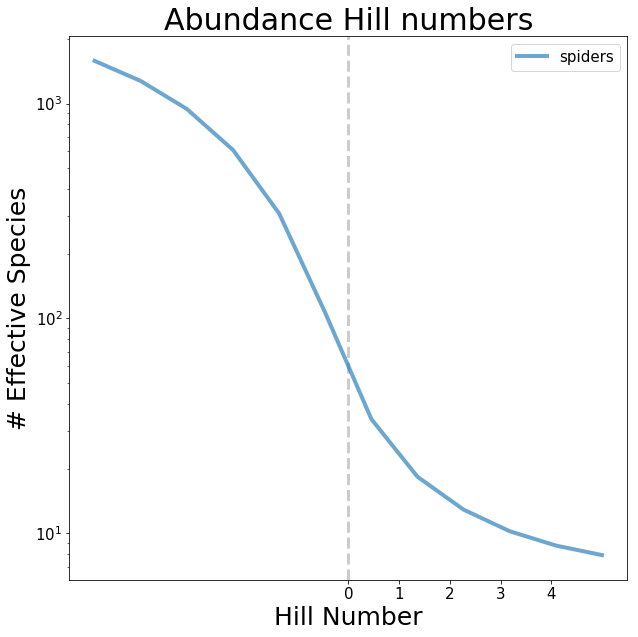

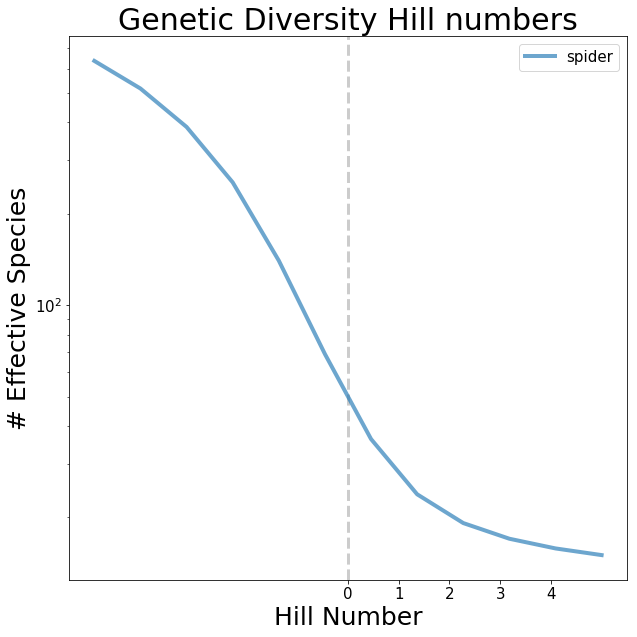

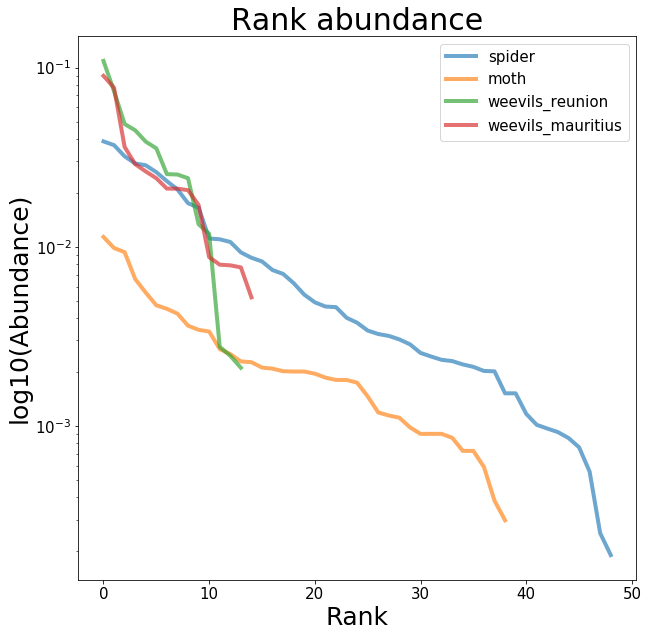

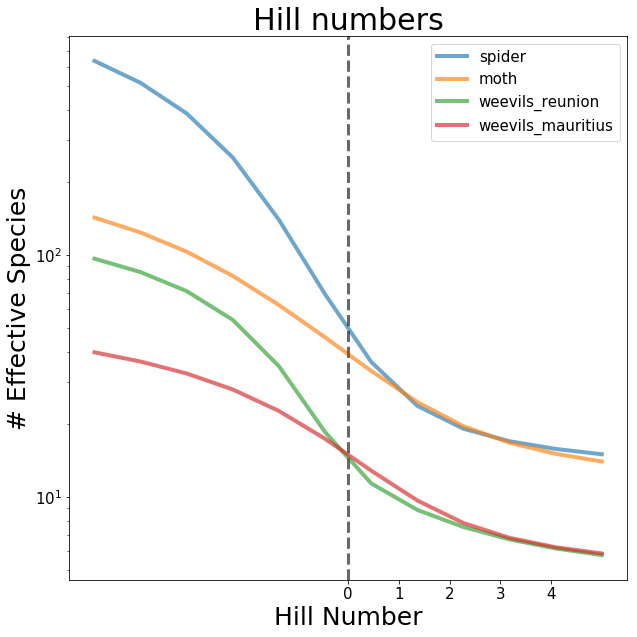

In [532]:

sp_abund_df = easyCGD.load_data(in_sp_abunds_df, labels="spiders")
sp_pis_df = easyCGD.load_data("spider.pis")
mo_pis_df = easyCGD.load_data("moth.pis")
wvm_pis_df = easyCGD.load_data("weevils_mauritius.pis")
wvr_pis_df = easyCGD.load_data("weevils_reunion.pis")

easyCGD.plot_RACs(sp_abund_df)
easyCGD.plot_RACs(sp_pis_df, plot_type="Genetic Diversity", title="Rank Genetic Diversity")
easyCGD.plot_hill_numbers(sp_abund_df, do_negative=True, title="Abundance Hill numbers")
easyCGD.plot_hill_numbers(sp_pis_df, do_negative=True, title="Genetic Diversity Hill numbers")

ax = easyCGD.plot_RACs(sp_pis_df)
_ = easyCGD.plot_RACs(mo_pis_df, ax=ax)
_ = easyCGD.plot_RACs(wvr_pis_df, ax=ax)
_ = easyCGD.plot_RACs(wvm_pis_df, ax=ax)

ax = easyCGD.plot_hill_numbers(sp_pis_df, do_negative=True)
_ = easyCGD.plot_hill_numbers(mo_pis_df, ax=ax, do_negative=True)
_ = easyCGD.plot_hill_numbers(wvr_pis_df, ax=ax, do_negative=True)
_ = easyCGD.plot_hill_numbers(wvm_pis_df, ax=ax, do_negative=True)


## If you have abundance and genetic diversity information you can look at the correlation between these

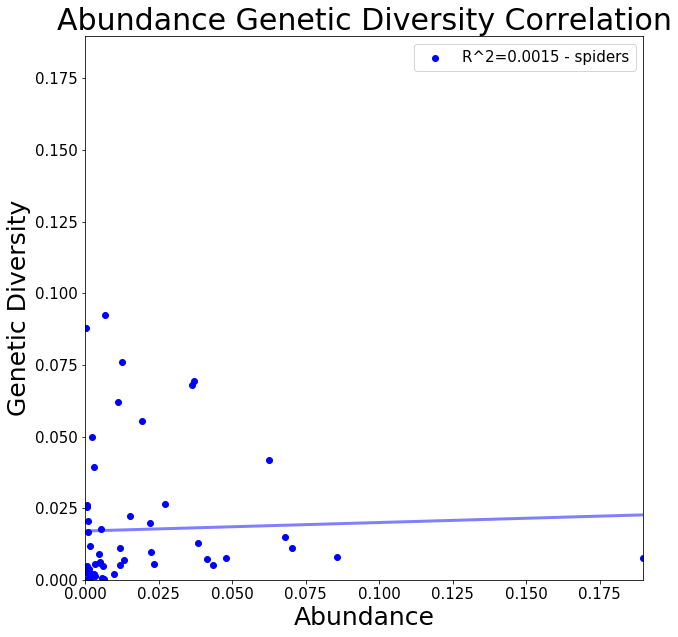

In [587]:
import easyCGD
ax = easyCGD.plot_abundance_diversity_correlation(sp_abund_df, sp_pis_df, log_transform=True,\
                                             color="b", do_proportions=True, drop_zeros=False,\
                                                    make_square=True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


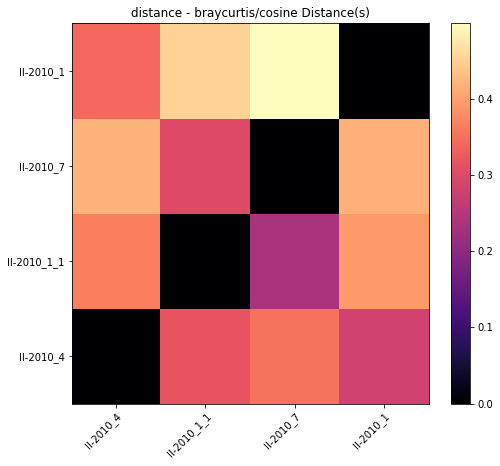

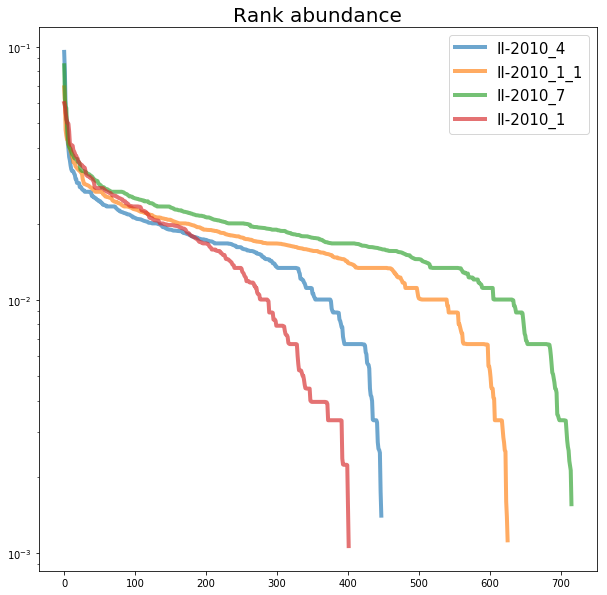

In [387]:
f = glob.glob("/home/isaac/easyCGD/jupyter-notebooks/aquatic_obs/II/II-2010*.pis")
df = easyCGD.load_dfs(f)
dat = df.T.fillna(value=0)
easyCGD.plot_distances(dat, labels=df.columns, metric=["braycurtis", "cosine"])


## Experimental below here
Here messing with the aquatic meta-data

array([[ 0.        ,  0.31664437,  0.35168632,  0.28419961],
       [ 0.36536352,  0.        ,  0.23458501,  0.39315315],
       [ 0.4194315 ,  0.29907951,  0.        ,  0.41644136],
       [ 0.34016633,  0.45308696,  0.49920148,  0.        ]])

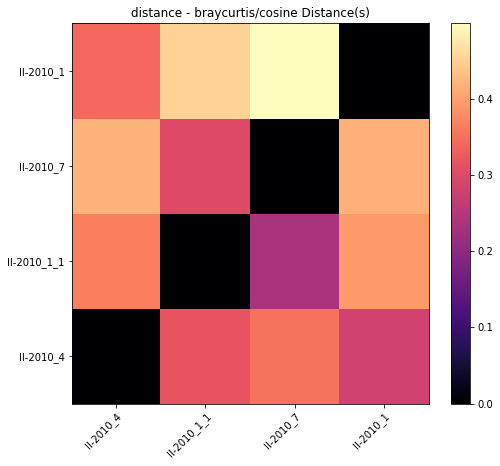

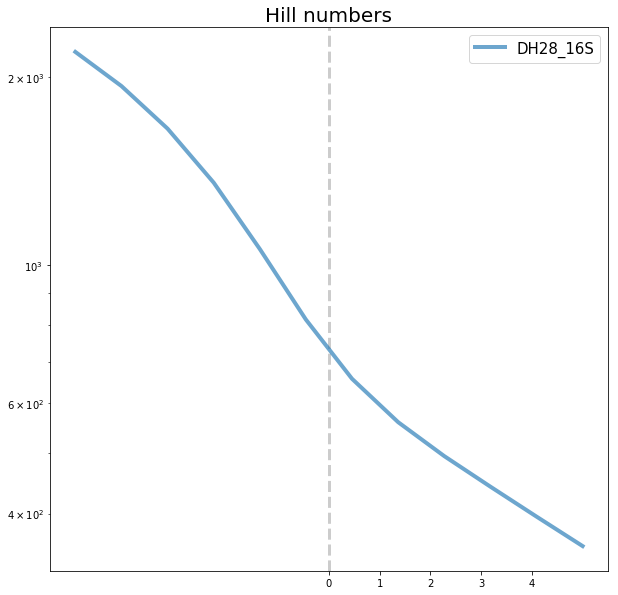

In [24]:
ax = easyCGD.plot_hill_numbers(dfs["DH28_16S"], do_negative=True)


## Figuring out KL divergence between abundance and genetics

* [Useful entropy/KL chapter](https://www.stat.cmu.edu/~cshalizi/754/2006/notes/lecture-28.pdf)

inf

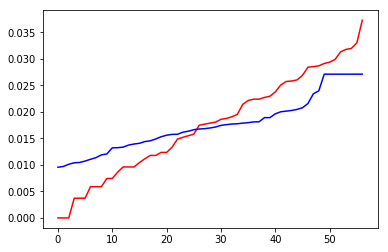

In [186]:
from scipy.stats import entropy

prop = True

sp_abund_df = easyCGD.load_data(in_sp_abunds_df, labels="spiders")
sp_pis_df = easyCGD.load_data("spider.pis")

sp_abund_df = np.log(sp_abund_df)
sp_pis_df = np.log(sp_pis_df+0.0001)
if prop:
    ak = (sp_abund_df/float(sp_abund_df.sum()))
    pk = (sp_pis_df/float(sp_pis_df.sum()))
else:
    ak = sp_abund_df
    pk = sp_pis_df
ak = np.sort(ak.iloc[:, 0].values)
pk = np.sort(pk.iloc[:, 0].values)
plt.plot(ak, color="r")
plt.plot(pk, color="b")
#entropy(pk, ak)

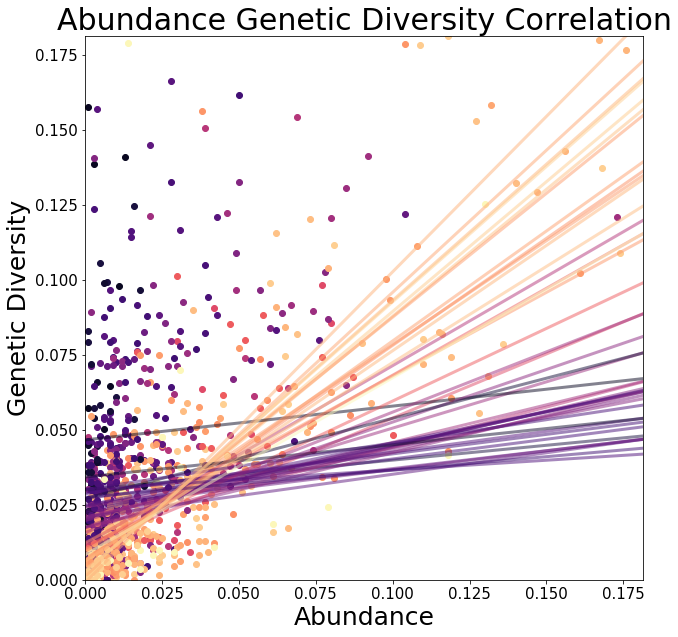

In [596]:
import glob
simfile = "/home/isaac/Continuosity/MESS/MESS/lessmig_MESS/wat-071834165/island1-0.908-megalog.txt"
sim = pd.read_csv(simfile)
sim_abund = pd.DataFrame(sim["Ne_local"])
sim_pi = pd.DataFrame(sim["pi_local"])
#easyCGD.plot_abundance_diversity_correlation(sim_abund/100, sim_pi, log_transform=True)

def plot_sims(files):
    fig, ax = plt.subplots(figsize=(10,10))
    c = np.linspace(0, 1, len(files))
    for simfile in simfiles:
        eq = float(simfile.split("-")[-2])
        sim = pd.read_csv(simfile)
        sim_abund = pd.DataFrame(sim["Ne_local"])
        sim_pi = pd.DataFrame(sim["pi_local"])
        easyCGD.plot_abundance_diversity_correlation(sim_abund/100, sim_pi,\
                                                     log_transform=True, ax=ax,\
                                                     color=plt.cm.magma(eq),\
                                                     do_proportions=True,\
                                                     make_square=True,
                                                     label=eq,
                                                     legend=False)
        

#simfiles = glob.glob("/home/isaac/Continuosity/MESS/MESS/5kharm-lowmig_MESS/wat-133*/*megalog.txt")[:3]
simfiles = glob.glob("/home/isaac/Continuosity/MESS/MESS/constlessmig_MESS/wat-5513*/*megalog.txt")
simfiles += glob.glob("/home/isaac/Continuosity/MESS/MESS/constlessmig_MESS/wat-5512*/*megalog.txt")
#simfiles = simfiles[:5]
plot_sims(simfiles)


# Figures for the Smithsonian talk

## Generating and plotting simulated distributions

In [9]:
import numpy as np
even = np.array([500] * 100)
unif = np.random.uniform(1000, size=100).astype(int)
ln = np.random.lognormal(6, 1, size=100).astype(int)
ls = np.random.logseries(.9998, size=100).astype(int)
poi = np.random.poisson(500, size=100)
nbi = np.random.negative_binomial(5, .009, size=100)
w = np.random.weibull(.172, size=100).astype(int)
z = np.random.zipf(1.5, size=100)

sim_dict = {"Even":even,\
            "Uniform":unif,\
            "lognormal":ln,\
            "logseries":ls}
#            "Poisson":poi,\
#            "neg binomial":nbi,
#            "Weibull":w,\
#            "Zipf":z}
print("Distribution/Total Abundance")
for k,v in sim_dict.items():
    print(k, np.sum(v))

tot = 0
ndraws = 10000
#for i in range(ndraws):
#    tot += np.sum(np.random.weibull(.172, size=100))
#print(tot/ndraws)
#wei = np.random.weibull(.175, size=100)
#print(np.sum(wei), wei)
#print(np.sort(sim_dict["Weibull"]).astype(int))

Distribution/Total Abundance
Even 50000
Uniform 52717
lognormal 61482
logseries 65602


In [6]:
df = pd.DataFrame.from_records(list(sim_dict.values()), index=list(sim_dict.keys())).T
df

,Even,Uniform,lognormal,logseries
0,500,103,753,47
1,500,60,1199,1
2,500,121,315,1
3,500,799,175,1015
4,500,910,1130,384
5,500,969,139,2
6,500,204,1190,1324
7,500,741,93,27
8,500,855,573,19
9,500,713,108,245


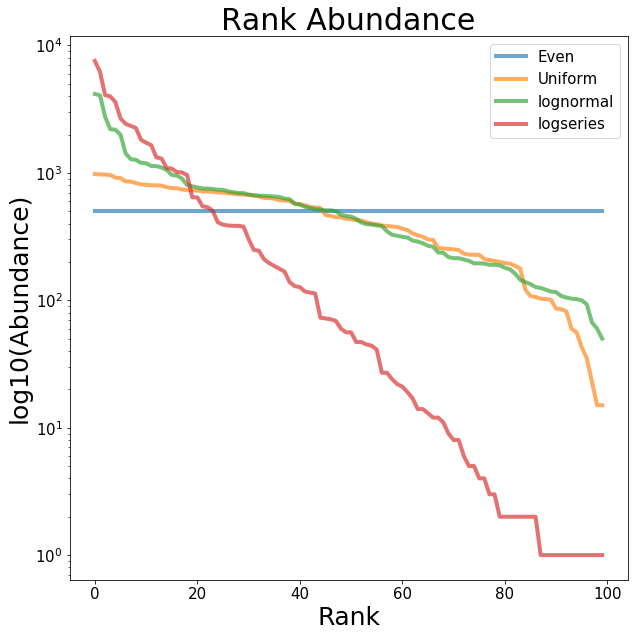

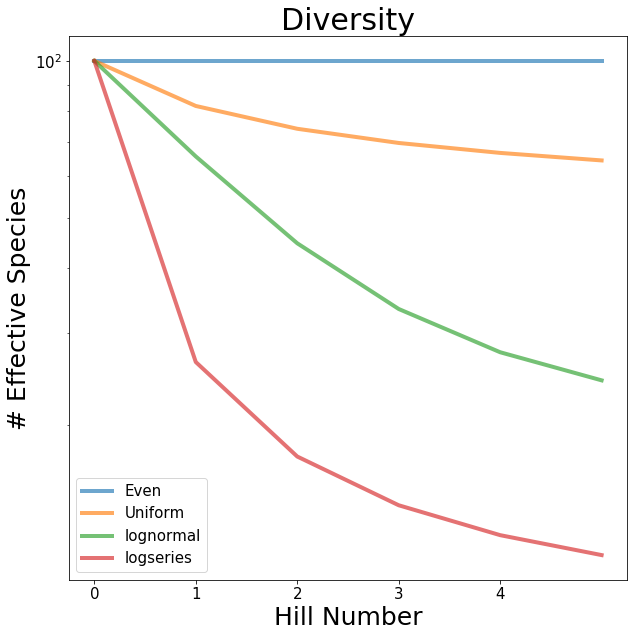

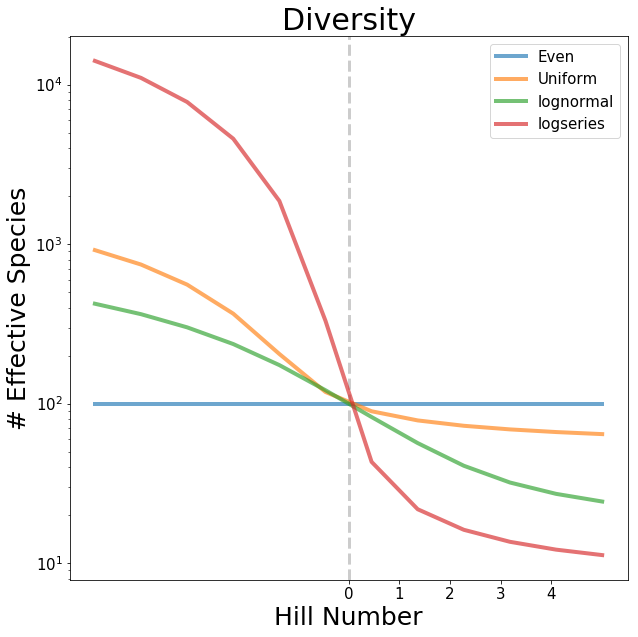

In [7]:
import easyCGD
import matplotlib.pyplot as plt
from IPython.display import display
dat = pd.DataFrame(df[["Even", "Uniform"]])
ax = easyCGD.plot_RACs(df, title="Rank Abundance")
ax = easyCGD.plot_hill_numbers(df, title="Diversity", do_negative=False)
ax = easyCGD.plot_hill_numbers(df, title="Diversity", do_negative=True)


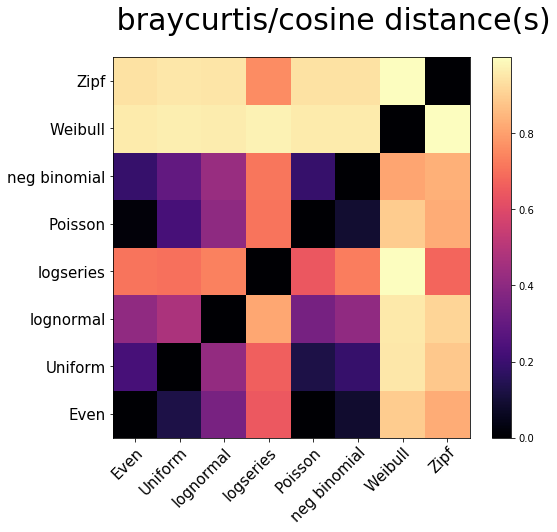

In [219]:
import easyCGD
isinstance(df, pd.DataFrame)
len(df.columns)
ax, sq1 = easyCGD.plot_distances(df, metric=["braycurtis", "cosine"])

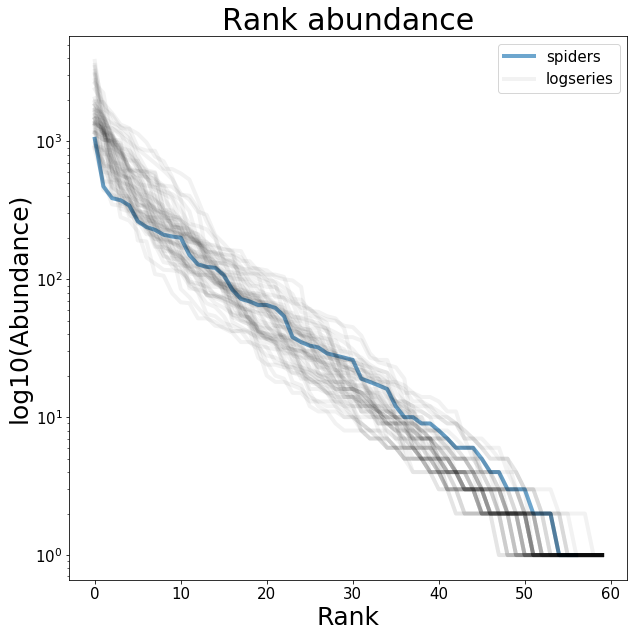

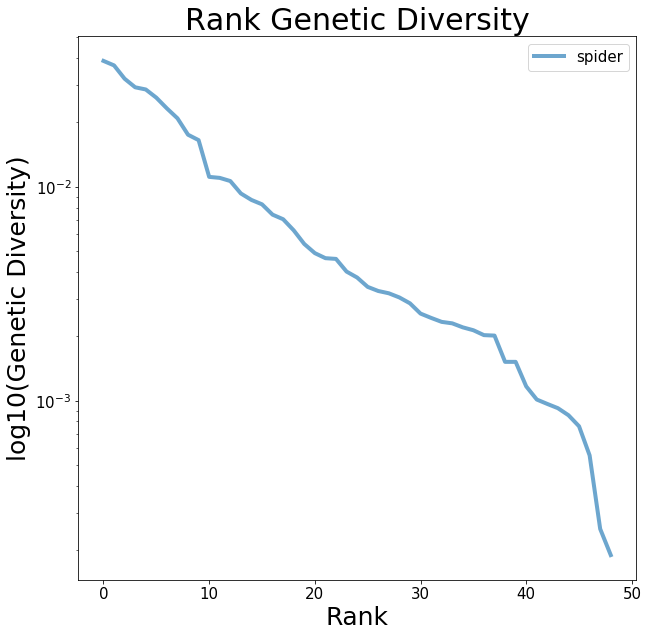

In [321]:
from collections import OrderedDict
import easyCGD

ax_a = easyCGD.plot_RACs(sp_abund_df)
ls = pd.DataFrame(np.random.logseries(.9989, size=(60, 50)).astype(int))
#pd.DataFrame(ls)
ax = easyCGD.plot_RACs(in_df=ls, ax=ax_a, alpha=0.05, label=None, color="black", add_sim_label="logseries")
ax_p = easyCGD.plot_RACs(sp_pis_df, trim_zeros=True, title="Rank Genetic Diversity", plot_type="Genetic Diversity")


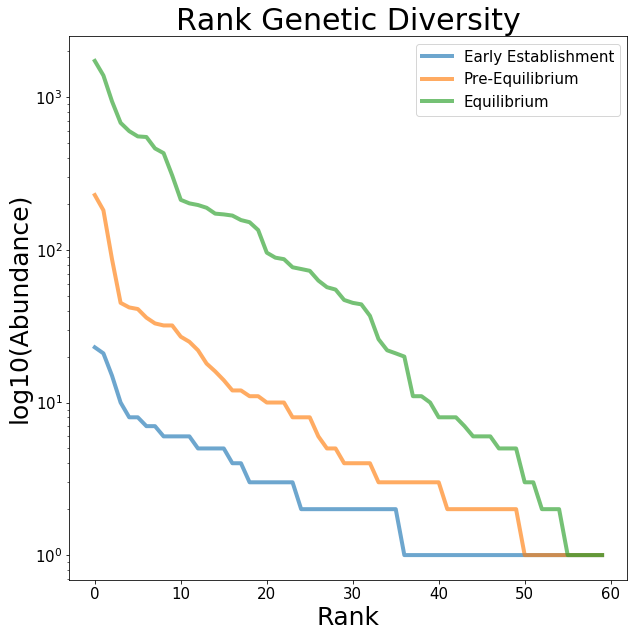

In [55]:
import easyCGD

ls = pd.DataFrame(np.random.logseries(.9, size=60).astype(int))
ax_a = easyCGD.plot_RACs(ls, label="Early Establishment")
ls = pd.DataFrame(np.random.logseries(.986, size=60).astype(int))
ax_a = easyCGD.plot_RACs(ls, label="Pre-Equilibrium", ax=ax_a)
ls = pd.DataFrame(np.random.logseries(.9989, size=60).astype(int))
ax_a = easyCGD.plot_RACs(ls, label="Equilibrium", ax=ax_a, title="Rank Genetic Diversity")

#ls = pd.DataFrame(np.random.logseries(.9989, size=(60, 50)).astype(int))

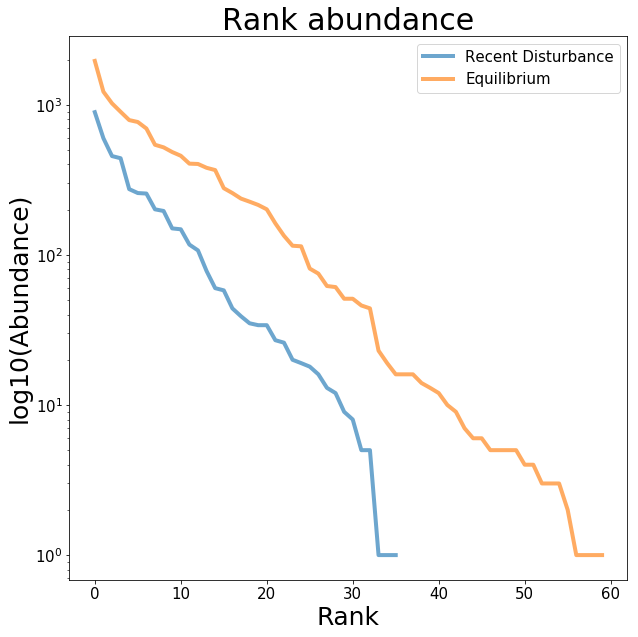

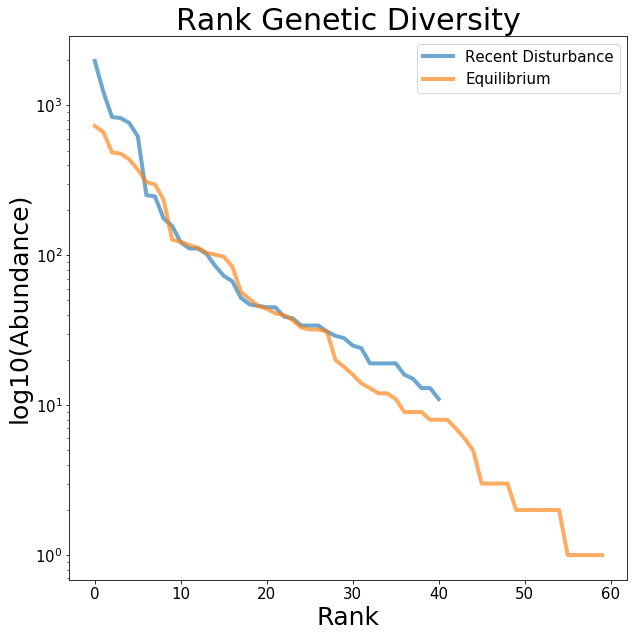

In [54]:
import easyCGD

ls = pd.DataFrame(np.random.logseries(.998, size=60).astype(int))
## simulate the disturbance
ls = ls - 10
ls[ls < 0] = 0
ax_a = easyCGD.plot_RACs(ls, label="Recent Disturbance")
## Too much information, remove the invasion scenario
#ls = pd.DataFrame(np.random.logseries(.9989, size=60).astype(int))
#ls.iloc[0] = 5000
#ax_a = easyCGD.plot_RACs(ls, label="Invasion", ax=ax_a)
ls = pd.DataFrame(np.random.logseries(.9989, size=60).astype(int))
easyCGD.plot_RACs(ls, label="Equilibrium", ax=ax_a)

## Genetics plots

ls = pd.DataFrame(np.random.logseries(.9985, size=60).astype(int))
ls[ls < 10] = 0
ax_p = easyCGD.plot_RACs(ls, label="Recent Disturbance")
#ls = pd.DataFrame(np.random.logseries(.9989, size=60).astype(int))
#ax_p = easyCGD.plot_RACs(ls, label="Invasion", ax=ax_p)
ls = pd.DataFrame(np.random.logseries(.9989, size=60).astype(int))
easyCGD.plot_RACs(ls, label="Equilibrium", ax=ax_p, title="Rank Genetic Diversity")
#ls = pd.DataFrame(np.random.logseries(.9989, size=(60, 50)).astype(int))

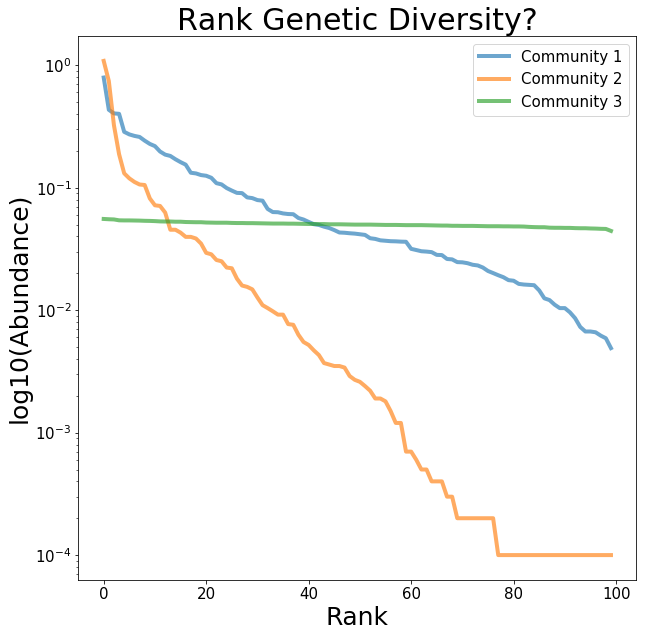

In [65]:
tmpdf = df[["lognormal", "logseries", "Poisson"]]
tmpdf.columns = ["Community 1", "Community 2", "Community 3"]
easyCGD.plot_RACs(tmpdf/10000, title="Rank Genetic Diversity?")

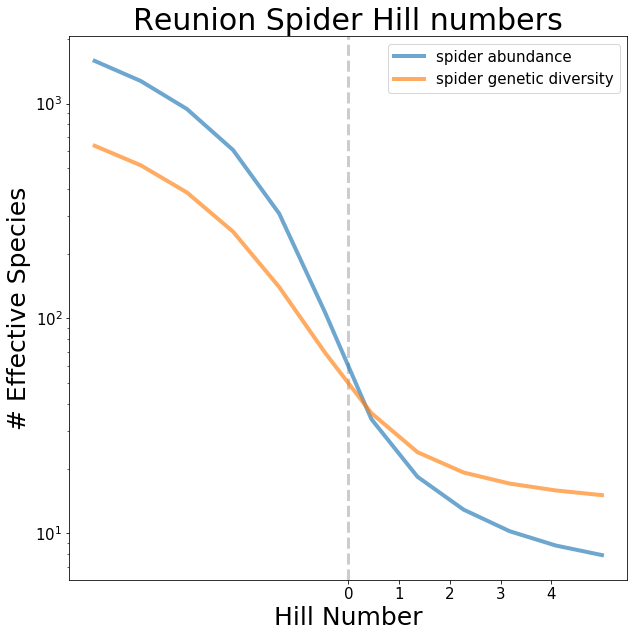

In [534]:
tmp_df = pd.concat([sp_abund_df, sp_pis_df], axis=1, sort=True).dropna()
tmp_df.columns = ["spider abundance", "spider genetic diversity"]
ax = easyCGD.plot_hill_numbers(tmp_df, do_negative=True, title="Reunion Spider Hill numbers")


# Weevils

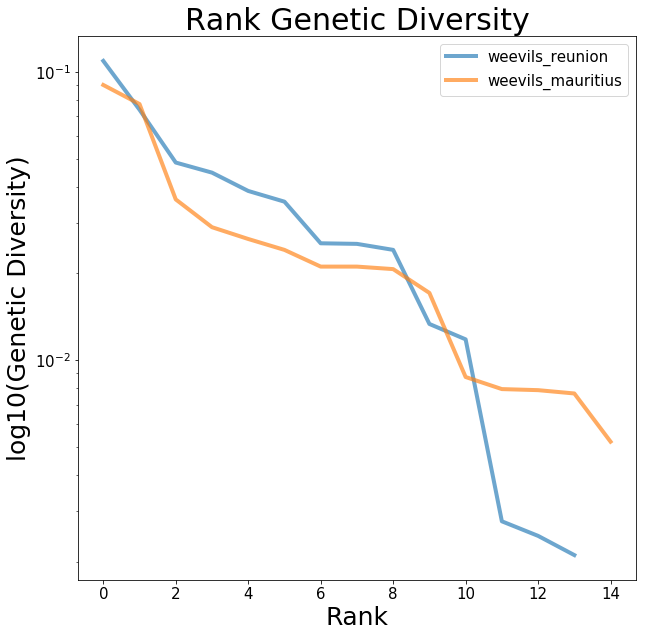

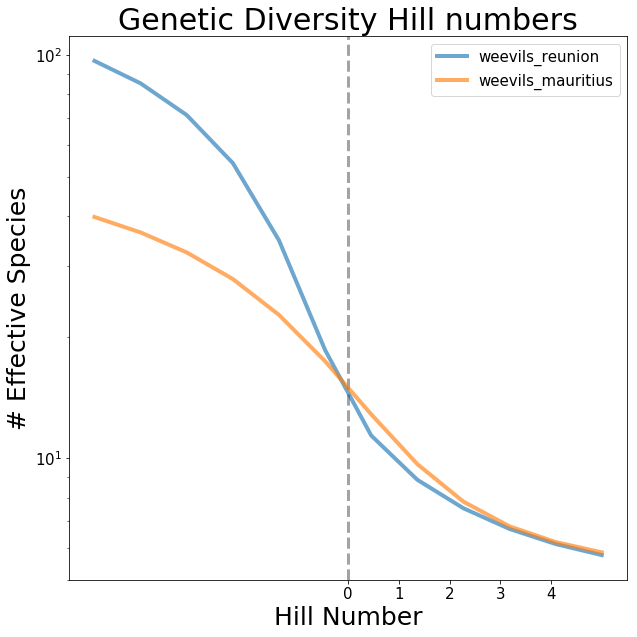

In [537]:
ax = easyCGD.plot_RACs(wvr_pis_df)
_ = easyCGD.plot_RACs(wvm_pis_df, ax=ax, plot_type="Genetic Diversity", title="Rank Genetic Diversity")

ax = easyCGD.plot_hill_numbers(wvr_pis_df, do_negative=True)
_ = easyCGD.plot_hill_numbers(wvm_pis_df, ax=ax, title="Genetic Diversity Hill numbers", do_negative=True)


# More experimental even yet

## Plot communities as pie charts

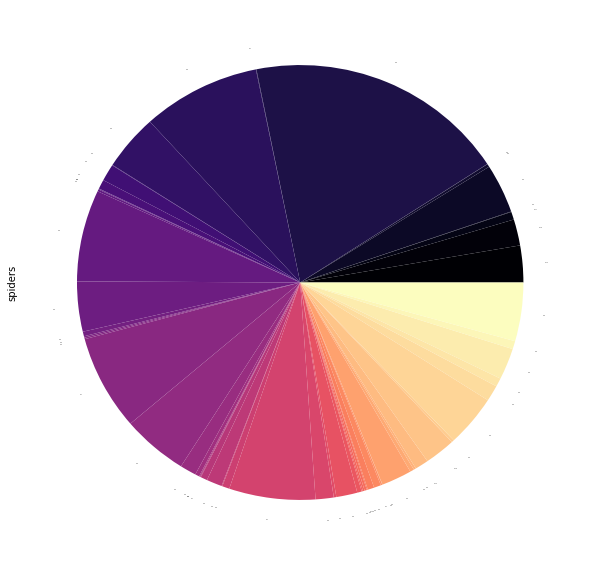

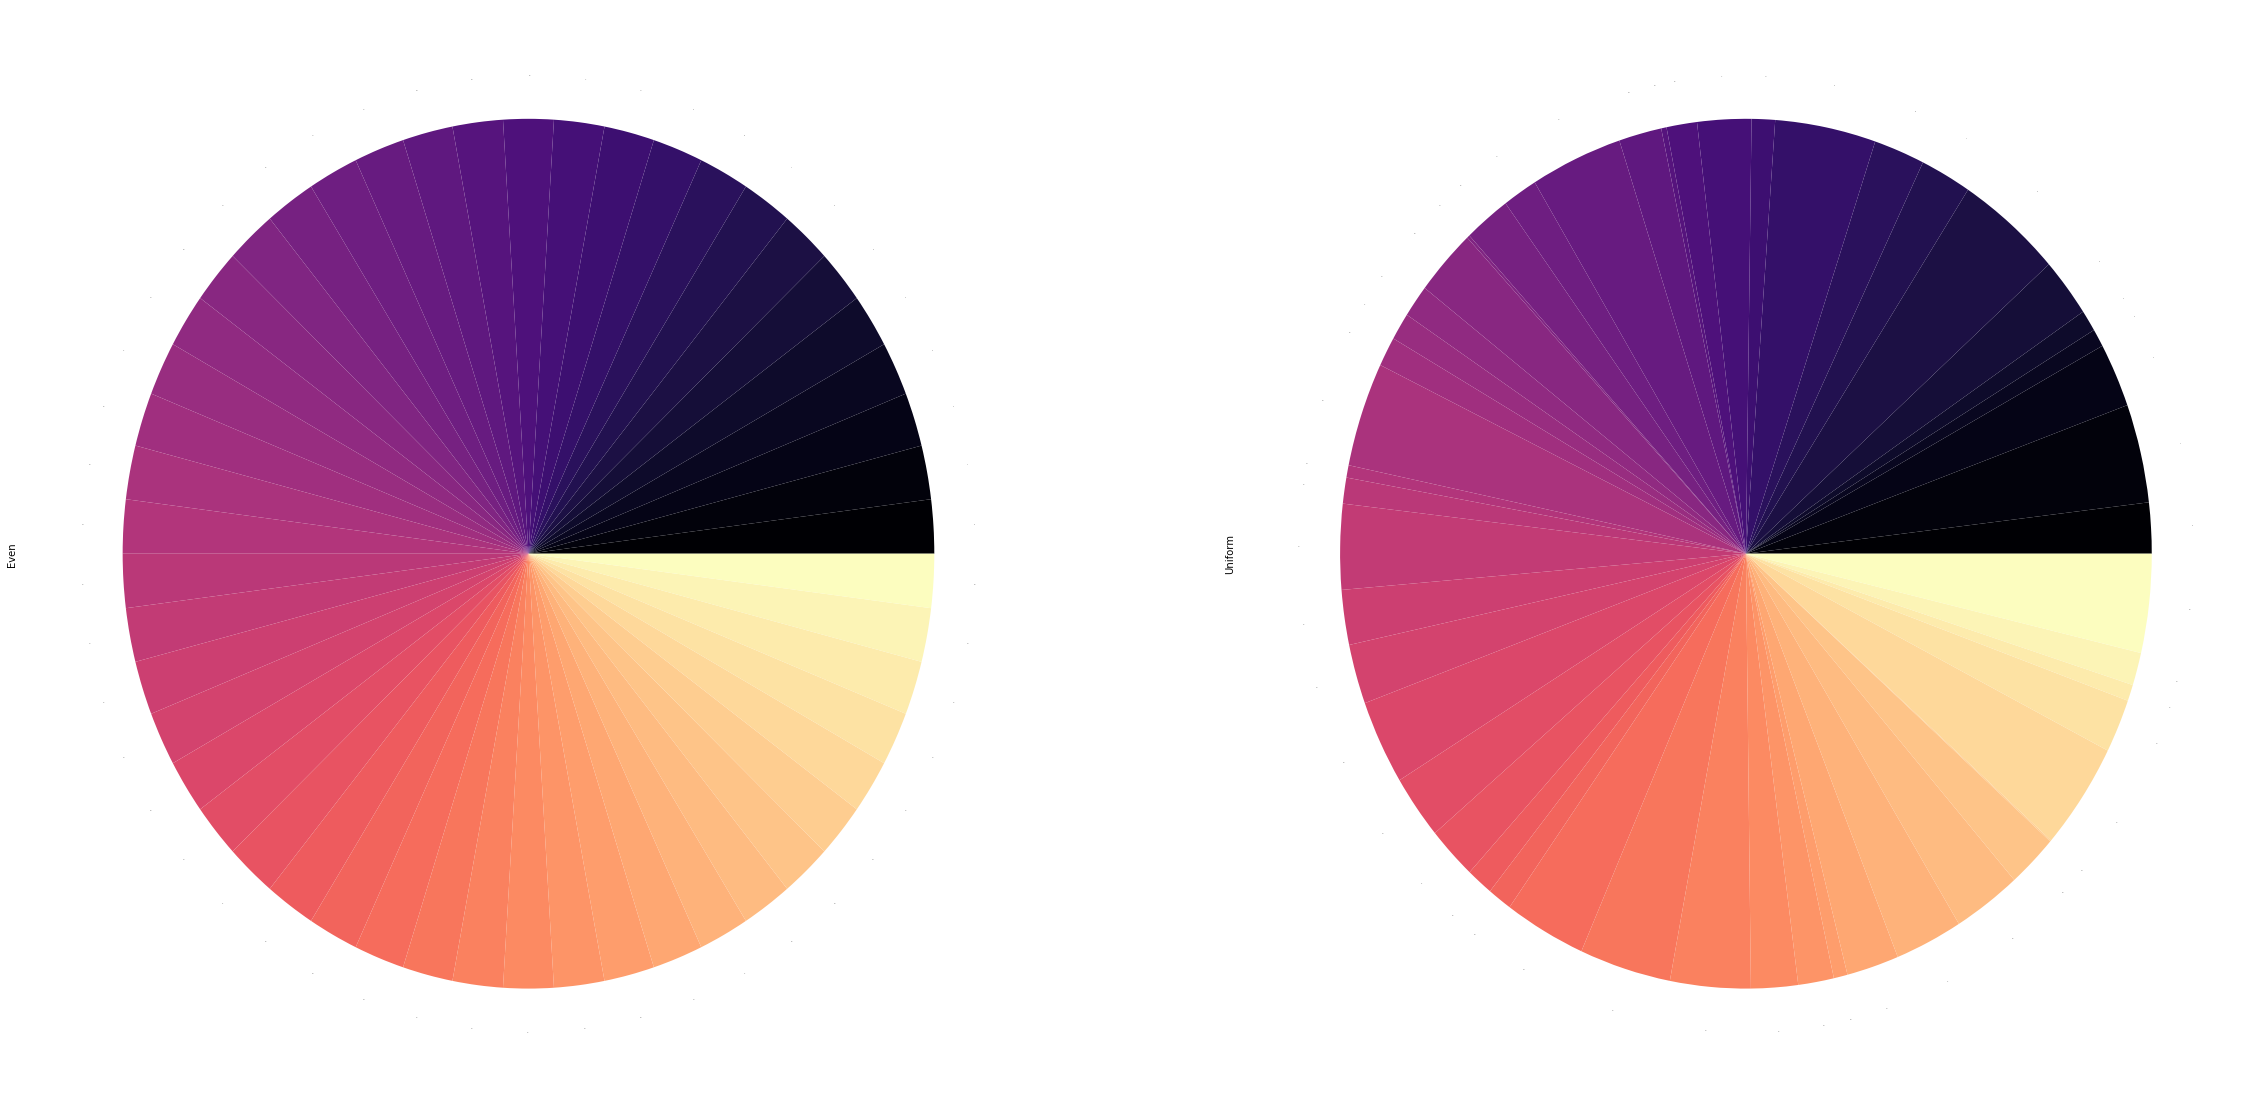

In [287]:
tot = np.sum(sp_abund_df)
ax = sp_abund_df.plot.pie(subplots=True, legend=False, figsize=(10, 10), fontsize=0, cmap="magma")
_ =df[["Even", "Uniform"]].iloc[:50].plot.pie(subplots=True, legend=False, fontsize=0, figsize=(40,20), cmap="magma")

# ooh boy lets try to get optimize working

/home/isaac/miniconda2/envs/momi-py36/lib/python3.6/site-packages/scipy/optimize/_minimize.py:518: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


 final_simplex: (array([[ 0.57499962],
       [ 0.57499962]]), array([ 0.683883  ,  0.91667959]))
           fun: 0.68388299692479515
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 200
           nit: 76
        status: 1
       success: False
             x: array([ 0.57499962])
 final_simplex: (array([[ 0.57499962],
       [ 0.57499962]]), array([ 0.683883  ,  0.91667959]))
           fun: 0.68388299692479515
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 200
           nit: 76
        status: 1
       success: False
             x: array([ 0.57499962])
[ 0.57499962]


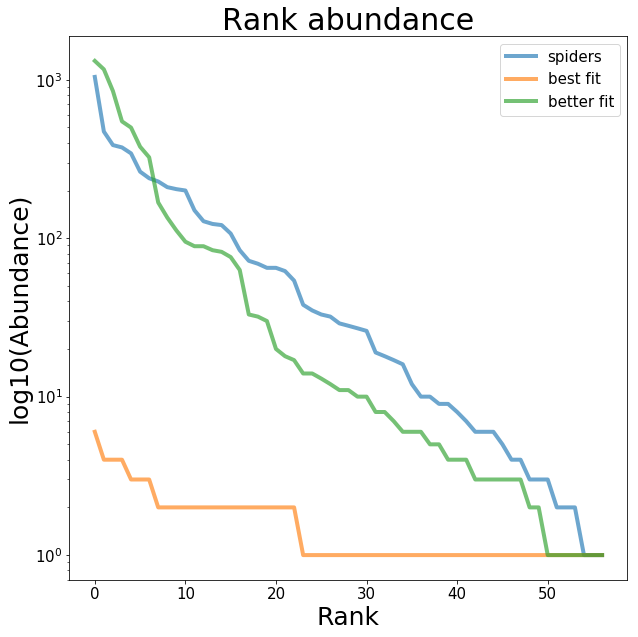

In [504]:
from scipy.optimize import minimize, minimize_scalar, Bounds, basinhopping
from scipy.stats import entropy, ks_2samp

test_ls = np.random.logseries(.9993, size=len(sp_pis_df)).astype(int)
test_ls.sort()
ax = easyCGD.plot_RACs(sp_abund_df)
#ax = easyCGD.plot_RACs(pd.DataFrame(ls, columns=["logseries"]), ax=ax)
def f(x):
    res_list = []
    for i in range(10):
        ls = np.random.logseries(x, size=len(sp_abund_df)).astype(int)
        ls.sort()
        res = entropy(ls, test_ls)
        res_list.append(res)
    #print(x, np.min(res_list))
    return np.min(res_list)

#def f(x):
#    print(x)
#    ls = np.random.logseries(x, size=len(sp_abund_df)).astype(int)
#    res = ks_2samp(ls, sp_abund_df["spiders"].values)
#    print(1-res[1])
#    return 1-res[1]

#res = minimize(f, x0=[.5], bounds=Bounds(0.1, .999999), options={'xtol':1e-3}, method="TNC")
#print(res)

res = basinhopping(f, x0=[.99], niter=1000, stepsize=0.001, interval=20, T=0.01,\
                   disp=True, minimizer_kwargs={"method":"TNC", 'bounds':Bounds(0.1, .999999)})


#res = minimize_scalar(f, bounds=(0.1, .999999), method="bounded", options={'maxiter':1000, 'xatol':1e-20})
print(res)
print(res["x"])
ls = np.random.logseries(res["x"], size=len(sp_pis_df)).astype(int)
#tot = np.sum(ls)
#ls = (ls/tot)
#print(ls)
ax = easyCGD.plot_RACs(pd.DataFrame(ls, columns=["best fit"]), ax=ax)
ls = np.random.logseries(0.99935138, size=len(sp_pis_df)).astype(int)
ax = easyCGD.plot_RACs(pd.DataFrame(ls, columns=["better fit"]), ax=ax)

In [477]:
def f(x):
    res_list = []
    for i in range(10000):
        ls = np.random.logseries(x, size=len(sp_abund_df)).astype(int)
        ls.sort()
        sp_abund_df["spiders"].values.sort()
        res = entropy(ls, sp_abund_df["spiders"].values)
        res_list.append(res)
    print(x, np.min(res_list))
    return np.array(res_list)
#f(0.99126762).min()
f(0.99267255).min()



0.99267255 0.00504594425435


0.005045944254347498

[  1.64322164  60.38558604  29.42121831  29.11616864   6.17640274
   2.94115103  43.20759155  22.15379953   1.          19.01559273
   7.23137612  10.62240819  14.80388501   1.          73.80174058
   1.           7.5273176   28.17611437  12.84992239   9.32293939
   1.           9.12056435   2.41919708   8.76414403   9.69997358
   3.58820137  67.64729703  13.50963995  11.25822004   6.62839466
   3.18603469  54.38165323   3.46816884  12.75639714   1.48528776
   6.96983496   6.15102821   6.45620829   1.           3.35823194
  23.17495443   4.88230205   4.88230205  24.77211803   6.87659248
   8.28922018   3.98255079  19.9277157   45.73584771   1.
   1.          16.98668772  75.52711296  95.32202156  82.72685564
 100.           1.        ]


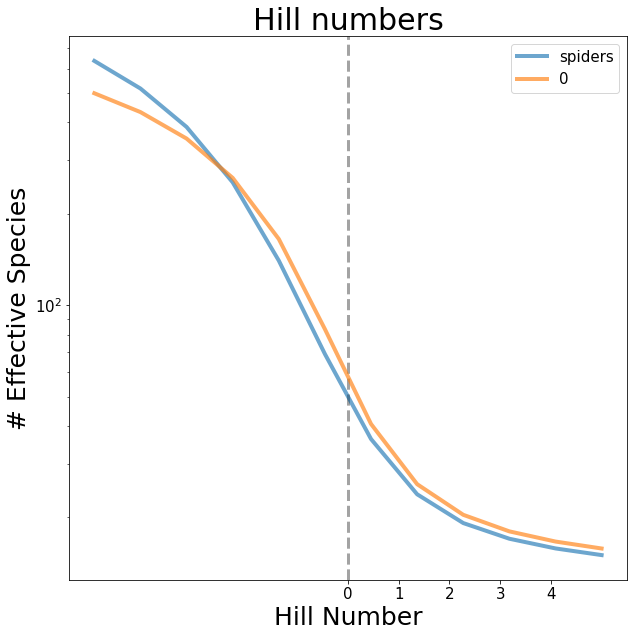

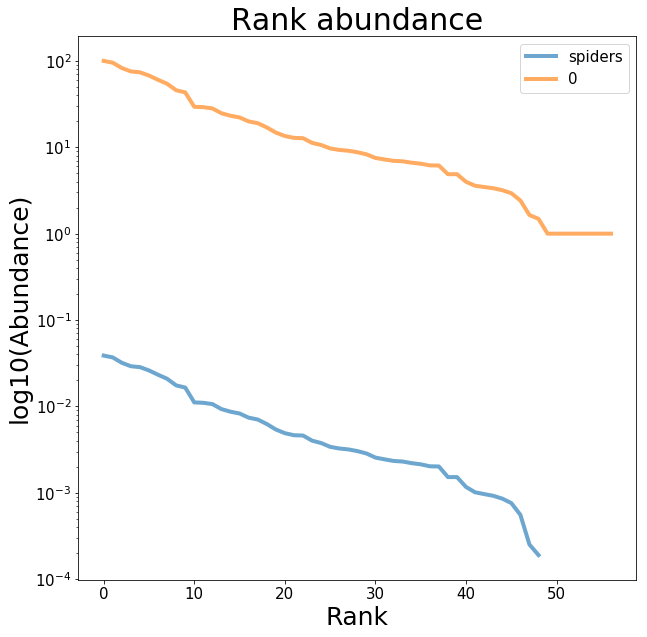

In [33]:
from sklearn.utils.extmath import softmax
import sklearn.preprocessing
import sklearn
ax = easyCGD.plot_hill_numbers(sp_pis_df, do_negative=True)

scaler = sklearn.preprocessing.minmax_scale(X=sp_pis_df["spiders"].values, feature_range=[1, 100])
print(scaler)
ax = easyCGD.plot_hill_numbers(pd.DataFrame(scaler), ax=ax, do_negative=True)

ax = easyCGD.plot_RACs(sp_pis_df)
ax = easyCGD.plot_RACs(pd.DataFrame(scaler), ax=ax)
#display(sp_pis_df)
#tmp = softmax([sp_pis_df["spider"].values])
#display(tmp)
#ax = easyCGD.plot_hill_numbers(tmp, do_negative=True, ax=ax)

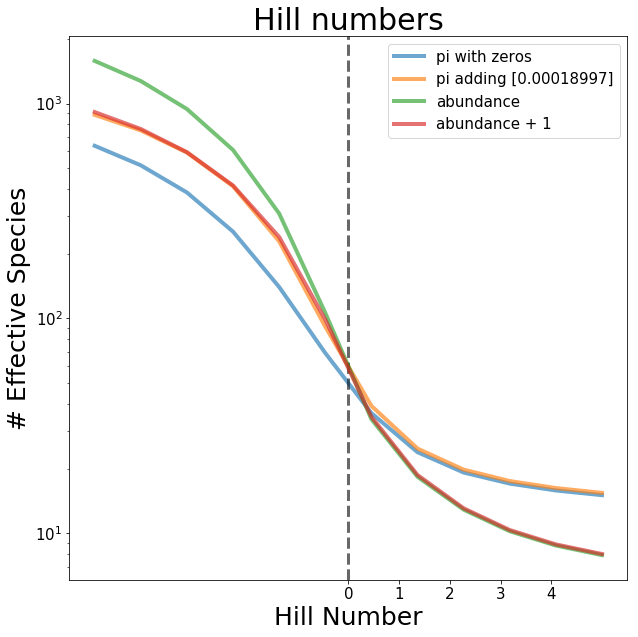

In [90]:
from sklearn.utils.extmath import softmax
import sklearn.preprocessing
import sklearn
sp_pis_df.columns = ["pi with zeros"]
ax = easyCGD.plot_hill_numbers(sp_pis_df, do_negative=True)

wat = sp_pis_df + .01
wat.columns = ["Adding .01"]
#ax = easyCGD.plot_hill_numbers(wat, do_negative=True, ax=ax)

wat = sp_pis_df + .001
wat.columns = ["Adding .001"]
#ax = easyCGD.plot_hill_numbers(wat, do_negative=True, ax=ax)

#wat = sp_pis_df + .00001
#wat.columns = ["Adding .00001"]
#ax = easyCGD.plot_hill_numbers(wat, do_negative=True, ax=ax)

#mindf = sp_pis_df.copy()
#minval = mindf[mindf["with zeros"] > 0].min()
#mindf[mindf["with zeros"] == 0] += minval
#mindf.columns = ["with 0s as {}".format(minval.values)]
#ax = easyCGD.plot_hill_numbers(mindf, do_negative=True, ax=ax)

mindf = sp_pis_df.copy()
minval = mindf[mindf["pi with zeros"] > 0].min()
mindf += minval
mindf.columns = ["pi adding {}".format(minval.values)]
ax = easyCGD.plot_hill_numbers(mindf, do_negative=True, ax=ax)

sp_abund_df.columns = ["abundance"]
ax = easyCGD.plot_hill_numbers(sp_abund_df, do_negative=True, ax=ax)
sp_abund_df.columns = ["abundance + 1"]
ax = easyCGD.plot_hill_numbers(sp_abund_df+1, do_negative=True, ax=ax)

with zeros    8
dtype: int64


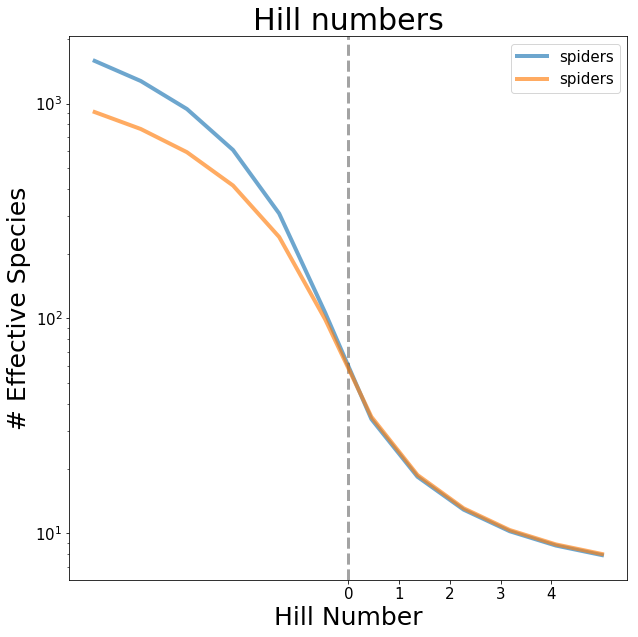

In [82]:
print(np.sum(sp_pis_df == 0))
sorted(sp_abund_df["spiders"])
ax = easyCGD.plot_hill_numbers(sp_abund_df, do_negative=True)
ax = easyCGD.plot_hill_numbers(sp_abund_df+1, do_negative=True, ax=ax)